In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import Counter
%matplotlib inline

# External functions to read the database
import inputs

In [2]:
LIGHTCURVES_PATH = '../data/lightcurves/'

In [3]:
# Loads the labels
df_labels = inputs.load_transient_labels(indir=LIGHTCURVES_PATH)

# Loads the lightcurves without labels associated to them
df_transient_nolabel = pd.read_csv(os.path.join(LIGHTCURVES_PATH, 'transient_lightcurves.csv'))
df_transient_nolabel = df_transient_nolabel.set_index(['ID', 'observation_id'])

# Joints the two tables to finally have lightcurves with labels associated to them
df_transient = df_labels.join(df_transient_nolabel, how='inner')

In [4]:
# This is how this new table looks
df_transient

class      Mag    Magerr  \
ID                        observation_id                            
TranID1409030010044114444 0                SN?  18.8765  0.166417   
                          1                SN?  20.0519  0.281733   
                          2                SN?  20.2199  0.295764   
                          3                SN?  21.1192  0.495390   
                          4                SN?  19.3289  0.195002   
...                                        ...      ...       ...   
TranID1209190181234125108 451469            SN  18.1952  0.123607   
                          451470            SN  18.2097  0.124706   
                          451471            SN  18.5116  0.138816   
                          451472            SN  18.3150  0.128915   
                          451473            SN  18.6342  0.152335   

                                                   MJD  
ID                        observation_id                
TranID1409030010044114444 0               53766.089871  
                          1               53990.458866  
                          2               53996.286004  
                          3               54385.205789  
                          4               54355.282285  
...                                                ...  
TranID1209190181234125108 451469          56189.314816  
                          451470          56189.322996  
                          451471          56205.285887  
                          451472          56205.292631  
                          451473          56218.237507  

[440469 rows x 4 columns]

In [5]:
# Count how many unique transient IDs we have.
ids = df_transient.index.get_level_values('ID').unique()
print('Number of unique transients:', len(ids))

Number of unique transients: 4869


In [6]:
# Loads the nontransient lightcurves and count how many do we have
df_nontransient = pd.read_csv(os.path.join(LIGHTCURVES_PATH, 'nontransient_lightcurves.csv'))
df_nontransient = df_nontransient.set_index(['ID'])
print('Number of unique nontransients:', len(df_nontransient.index.get_level_values('ID').unique()))

Number of unique nontransients: 84276


In [7]:
# Counts how many lightcurves per class do we have.
# Print them in reverse order
count = Counter(list((df_labels['class'])))
class_names = list(count.keys())
class_count = list(count.values())
ii = np.argsort(class_count)[::-1] # reverse order
for i in ii[::-1]:
    print("{} & {} \\\\".format(class_names[i], class_count[i]))

CV/Blazar & 1 \\
Var/Flare? & 1 \\
Ast/Flare & 1 \\
UvES & 1 \\
AGB & 1 \\
Var/Artifact & 1 \\
AGN/Var? & 1 \\
Ast/Var & 1 \\
CV/Ast? & 1 \\
Var/AGN & 1 \\
AMCVn? & 1 \\
Flare/CV & 1 \\
CV/Var? & 1 \\
Nova/CV & 1 \\
Blazar/SN & 1 \\
Ast/SN? & 1 \\
RRLyrae & 1 \\
FU & 1 \\
Comet/Ast? & 1 \\
O/Ne & 1 \\
HPM/Var? & 1 \\
SN/Var? & 1 \\
Ast/Var?? & 1 \\
SN/TDE? & 1 \\
Var/Nothing & 1 \\
SN/nothing? & 1 \\
Red & 1 \\
Very & 1 \\
Var/nothing? & 1 \\
Lensing/nothing? & 1 \\
OH-IR & 1 \\
AGN/nothing? & 1 \\
CV/SN? & 1 \\
Ast/Flare? & 1 \\
Maser & 1 \\
CV/Var/Ast & 1 \\
Nothing/Lensing & 1 \\
AGN/Flare? & 1 \\
OH_IR & 1 \\
Flare/SN? & 1 \\
Var/Nova & 1 \\
Nova? & 1 \\
LHS_5157 & 1 \\
RCorB & 1 \\
Merger/CV? & 1 \\
Unclear & 1 \\
HPM_GJ3329 & 1 \\
GRB & 1 \\
Carb & 2 \\
Var/Ast? & 2 \\
CV/Flare & 2 \\
QSO & 2 \\
Flare/SN & 2 \\
SN/Ast? & 2 \\
Carbon & 2 \\
Var/SN & 2 \\
SDSS & 2 \\
Ast/CV? & 2 \\
Variable & 2 \\
Ast/Var? & 2 \\
AGN/CV & 2 \\
RRL & 2 \\
Var/SN? & 2 \\
TDE? & 3 \\
CV/AGN? & 3 \\
HP

In [8]:
# Count:
# - number of points in every light-curve 
# - average magnitude per light curve
# - magnitude standard deviation per light curve 
n_points = len(set(df_transient.index.get_level_values('ID')))
len_curve = np.zeros(n_points)
classes = np.empty(n_points, dtype=object)
average_mag = np.zeros(n_points)
std_dev_mag = np.zeros(n_points)
chi_squared_trans = np.zeros(n_points)
for i in range(n_points):
    df_item = df_transient[df_transient.index.get_level_values('ID').isin(ids[i:i+1])]
    len_curve[i] = len(df_item)
    classes[i] = df_item['class'][0]
    average_mag[i] = np.average(df_item['Mag'])
    std_dev_mag[i] = np.std(df_item['Mag'])
    chi_squared_trans[i] = np.sum((df_item['Mag']-average_mag[i])**2/(df_item['Magerr']**2))/len_curve[i]

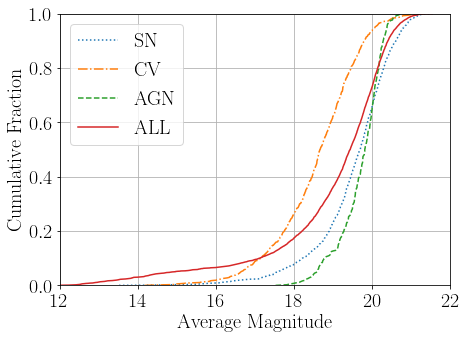

In [9]:
fig = plt.figure(figsize=(7,5))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
classes = np.array(classes)

for c,z in zip(['SN', 'CV', 'AGN'],[':', '-.', '--']):
    ii = (classes == c)
    tmp_len = average_mag[ii]
    tmp_len.sort()
    n_points = len(tmp_len)
    plt.plot(tmp_len, np.linspace(0,1,n_points), label=c, linestyle=z)
    
n_points = len(average_mag)
sorted_len = average_mag.copy()
sorted_len.sort()
plt.plot(sorted_len, np.linspace(0,1,n_points), label='ALL')
plt.ylim([0,1])
plt.xlim([12,22])
plt.xlabel('Average Magnitude')
plt.ylabel('Cumulative Fraction')
plt.grid()
plt.legend()
plt.savefig('cumulative_magnitude.pdf', bbox_inches='tight')

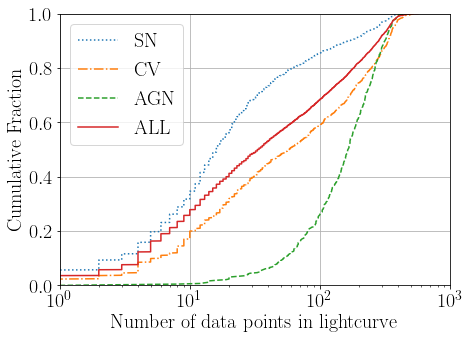

In [10]:
fig = plt.figure(figsize=(7,5))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
classes = np.array(classes)
len_curve = np.array(len_curve)

for c,z in zip(['SN', 'CV', 'AGN'],[':', '-.', '--']):
    ii = (classes == c)
    tmp_len = len_curve[ii]
    tmp_len.sort()
    n_points = len(tmp_len)
    plt.plot(tmp_len, np.linspace(0,1,n_points), label=c, linestyle=z)
    
n_points = len(len_curve)
sorted_len = len_curve.copy()
sorted_len.sort()
plt.plot(sorted_len, np.linspace(0,1,n_points), label='ALL')
_ = plt.semilogx()
plt.ylim([0,1])
plt.xlim([1,1000])
plt.xlabel('Number of data points in lightcurve')
plt.ylabel('Cumulative Fraction')
plt.grid()
plt.legend()
plt.savefig('cumulative_classes.pdf', bbox_inches='tight')

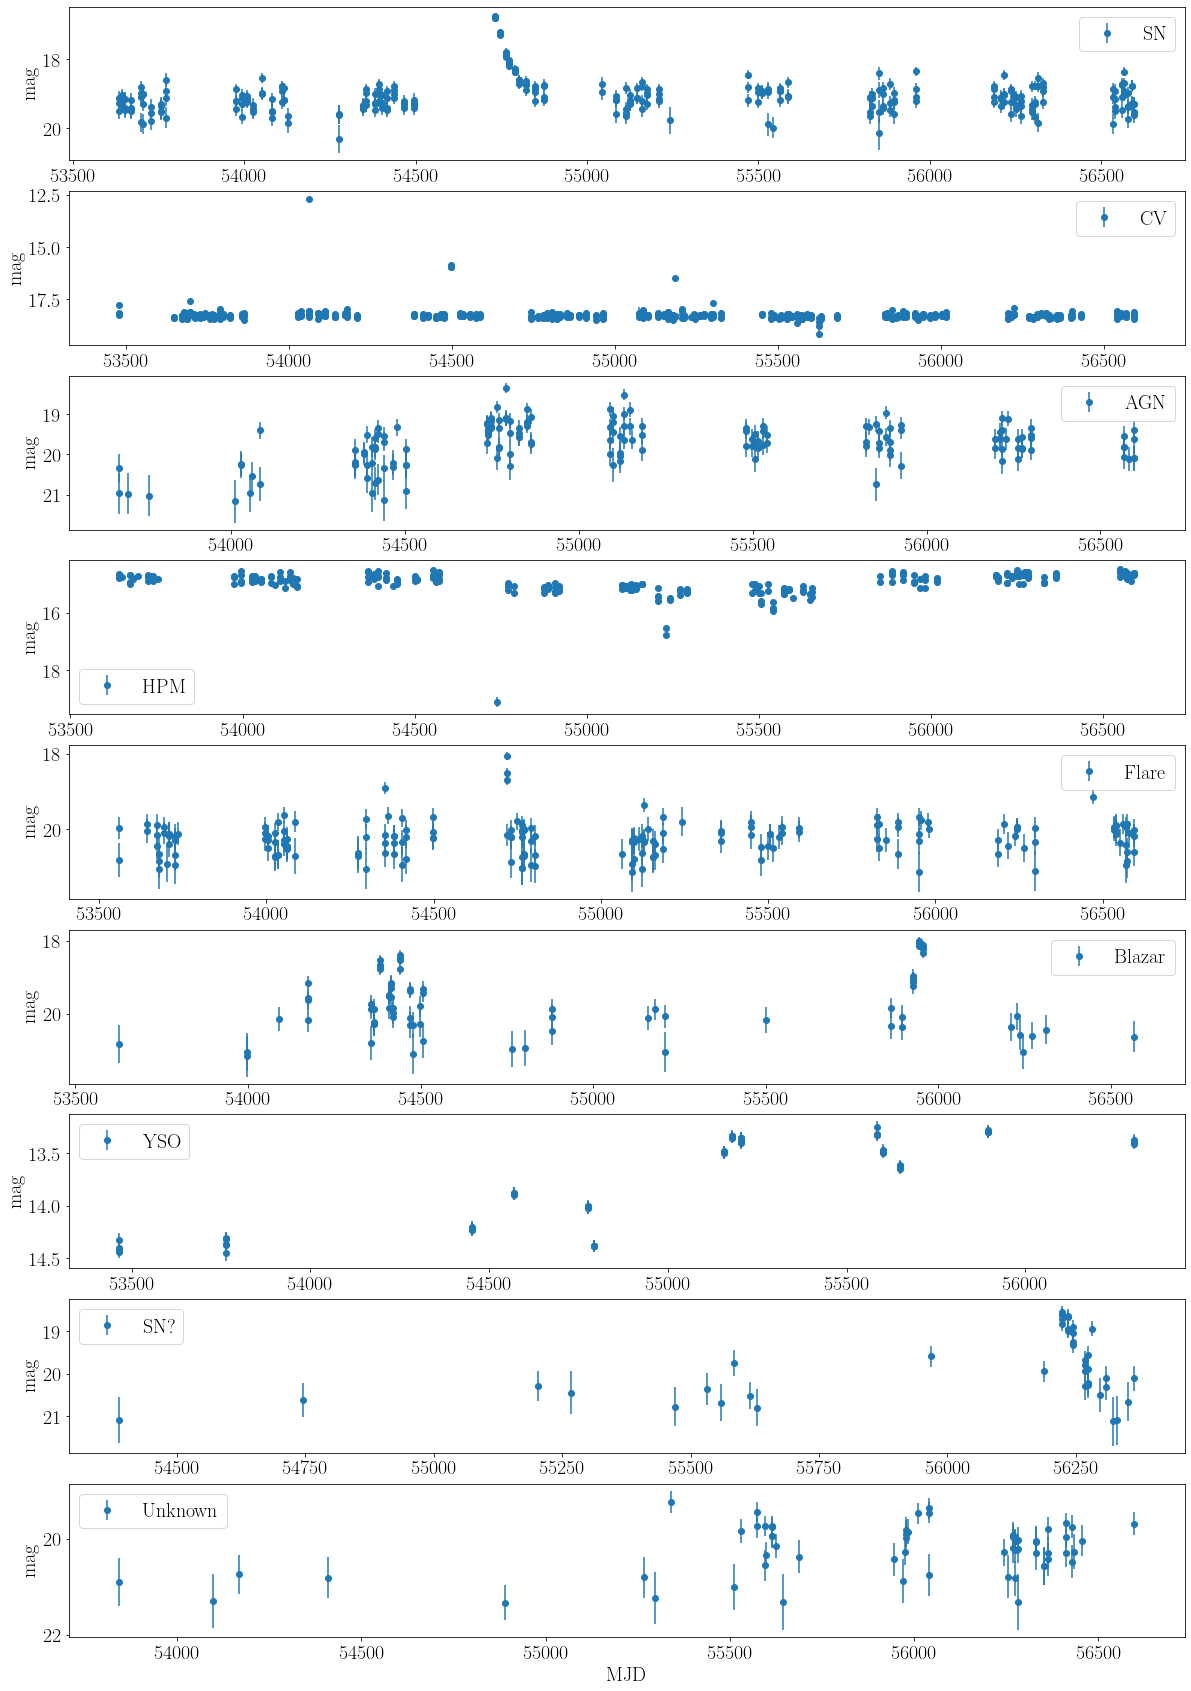

In [11]:
fig = plt.figure(figsize=(20,30))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
items = [121,  624, 400, 2900, 133, 501, 602, 456, 941]

for i in range(len(items)):
    id_item = items[i]
    fig.add_subplot(len(items),1,i+1)
    df_item = df_transient[df_transient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]
    plt.errorbar(df_item['MJD'], df_item['Mag'], yerr=df_item['Magerr'],fmt='o',label=df_item['class'][0])
    plt.gca().invert_yaxis()
    plt.legend()
    plt.ylabel('mag')
    
plt.xlabel('MJD')
plt.savefig('examples_transient.pdf', bbox_inches='tight')


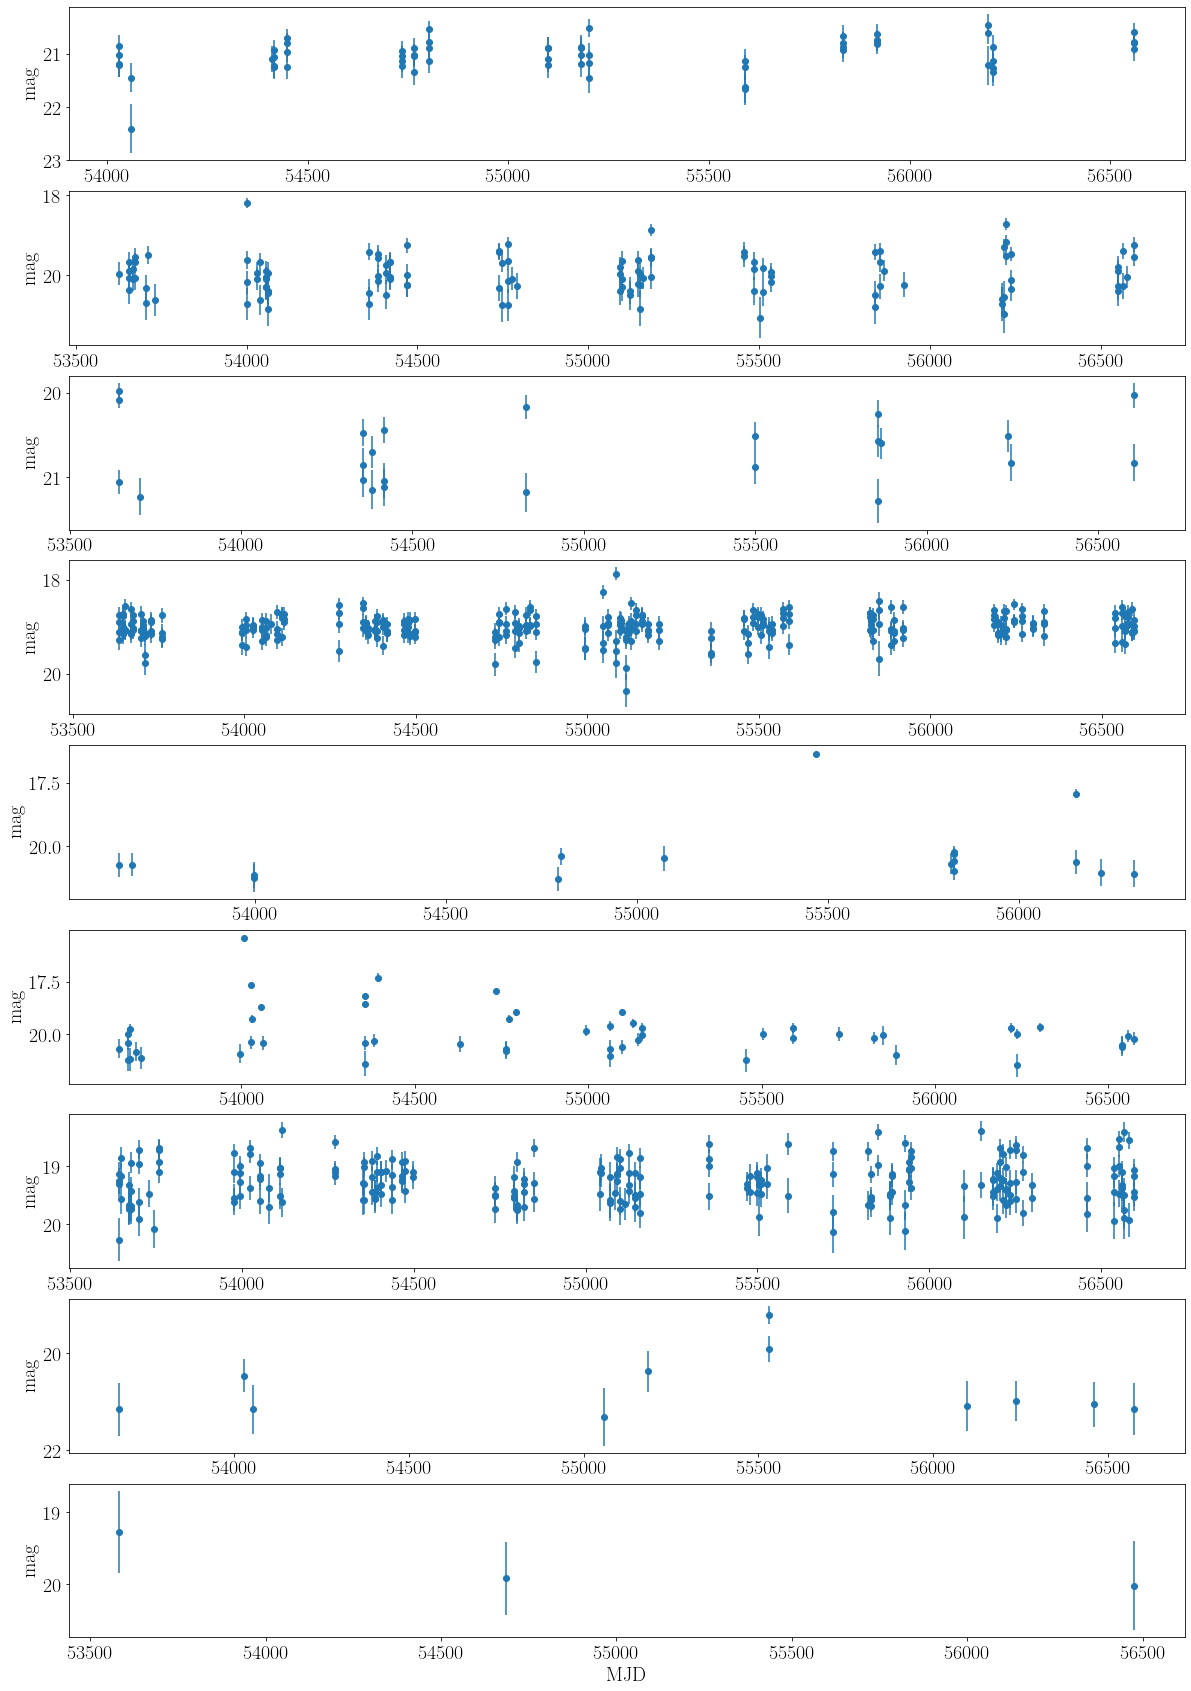

In [12]:
fig = plt.figure(figsize=(20,30))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)
items = [1210,  8624, 9400, 2900, 133, 501, 602, 456, 941]

ids = df_nontransient.index.get_level_values('ID').unique()

for i in range(len(items)):
    id_item = items[i]
    fig.add_subplot(len(items),1,i+1)
    df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]
    plt.errorbar(df_item['MJD'], df_item['Mag'], yerr=df_item['Magerr'],fmt='o')
    plt.gca().invert_yaxis()
    plt.ylabel('mag')
    
plt.xlabel('MJD')
plt.savefig('examples_nontransient.pdf', bbox_inches='tight')

In [13]:
df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])]

In [14]:
df_nontransient.index.get_level_values('ID').isin(ids[id_item:id_item+1])

array([False, False, False, ..., False, False, False])

In [15]:
# Count:
# - number of points in every non-transiente light-curve 
# - average magnitude per light curve
# - chi-squared for every non-transient light-curve
n_points = len(set(df_nontransient.index.get_level_values('ID')))
len_curve = np.zeros(n_points)
average_mag = np.zeros(n_points)
std_dev_mag = np.zeros(n_points)
chi_squared_nontrans = np.zeros(n_points)
for i in range(n_points):
    df_item = df_nontransient[df_nontransient.index.get_level_values('ID').isin(ids[i:i+1])]
    len_curve[i] = len(df_item)
    average_mag[i] = np.average(df_item['Mag'])
    std_dev_mag[i] = np.std(df_item['Mag'])
    chi_squared_nontrans[i] = np.sum((df_item['Mag']-average_mag[i])**2/(df_item['Magerr']**2))/len_curve[i]

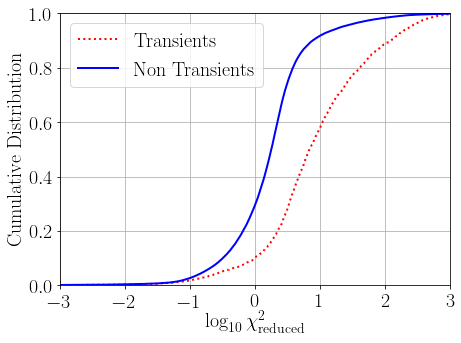

In [16]:
fig = plt.figure(figsize=(7,5))
plt.rc('text', usetex=True,)
plt.rc('font', family='serif', size=20)

n_t = np.count_nonzero(chi_squared_trans>0.0)
n_nt = np.count_nonzero(chi_squared_nontrans>0.0)
plt.plot(np.sort(np.log10(chi_squared_trans[chi_squared_trans>0.0])), np.linspace(0., 1., n_t), 
         linewidth=2, label='Transients', color='red', linestyle=':')
plt.plot(np.sort(np.log10(chi_squared_nontrans[chi_squared_nontrans>0.0])), np.linspace(0., 1.0, n_nt), 
         linewidth=2, color='blue', label='Non Transients')
plt.xlabel("$\log_{10} \chi^2_{\mathrm{reduced}} $")
plt.ylabel("Cumulative Distribution")
plt.legend(loc=2)
plt.grid()
plt.xticks(np.arange(-3.0, 4.0, 1.0))
plt.xlim([-3.0, 3.0])
plt.ylim([0.0, 1.0])
plt.savefig('cumulative_chi2.pdf', bbox_inches='tight')